In [3]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

# 导包获取糖尿病数据集
from sklearn.datasets import load_diabetes

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score, f1_score, PredictionErrorDisplay
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

import seaborn as sns

In [2]:
# This is a package in preview.

data_diabetes = load_diabetes()

In [3]:
data =  data_diabetes['data']
target = data_diabetes['target']
feature_names = data_diabetes['feature_names']

#现在三个数据都是numpy的一维数据形式，将她们组合成dataframe，可以更直观地观察数据
df =  pd.DataFrame(data,columns = feature_names)
df.head()  # 查看前几行数据

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [5]:
from sklearn.ensemble import GradientBoostingRegressor


def BuidModel(modelKey):
    if modelKey == 'svm':
        return SVC(probability=True, random_state=0)
    elif modelKey == 'rf':
        return RandomForestClassifier(n_estimators=512, random_state=0)
    elif modelKey == 'mlp':
        return MLPClassifier(max_iter=10000, random_state=0)
    elif modelKey == 'logistic':
        return LogisticRegression(random_state=0)
    elif modelKey == 'liner':
        return LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
    elif modelKey == 'gbr':
        return GradientBoostingRegressor(random_state=1)


In [16]:
train_X,test_X,train_Y,test_Y =  train_test_split(data,target,train_size =0.8)


model = BuidModel('liner')

# 3、训练数据
model.fit(train_X,train_Y)
# LinearRegression()

# 4、评估模型
model.score(train_X,train_Y)

0.5209605950968526

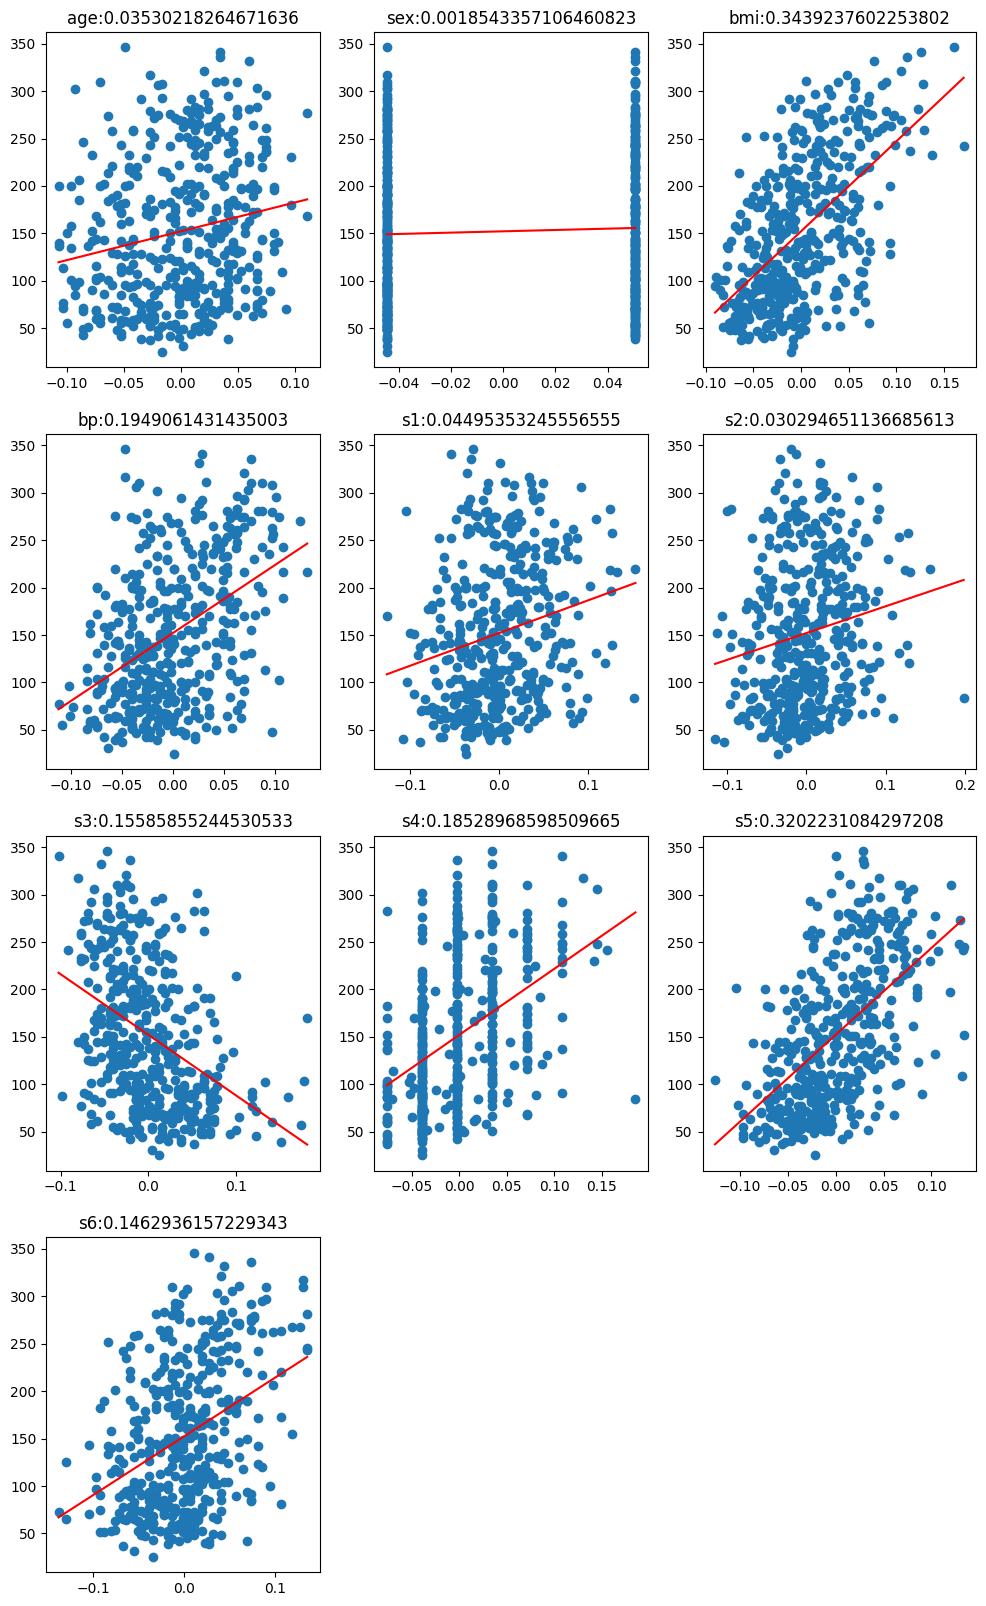

In [15]:
# 2、循环对每个特征值进行建模训练，作图

# 建立画板，作图5行2列的图
plt.figure(figsize=(12, 20))
for i,col in enumerate(df.columns):  #enumerate 枚举
    train_X = df.loc[:,col].values.reshape(-1,1)
# 每一次循环，都取出datafram中的一列数据，是一维Series数据格式，但是线性回归模型要求传入的是一个二维数据，因此利用reshape修改其形状
    train_Y = target
    linear_model = LinearRegression()    # 构建模型
    linear_model.fit(train_X,train_Y)    #训练模型
    score = linear_model.score(train_X,train_Y)   # 评估模型
#  以训练数据为X轴，标记为Y 轴，画出散点图，直观地看每个特征和标记直接的关系
    axes = plt.subplot(4,3,i+1)
    plt.scatter(train_X,train_Y)
# 画出每一个特征训练模型得到的拟合直线 y= kx + b
    k =  linear_model.coef_     # 回归系数
    b =  linear_model.intercept_   # 截距
    x = np.linspace(train_X.min(),train_X.max(),100)
    y = k * x + b
# 作图
    plt.plot(x,y,c='red')
    axes.set_title(col + ':' + str(score))
plt.show()

NameError: name 'BuidModel' is not defined

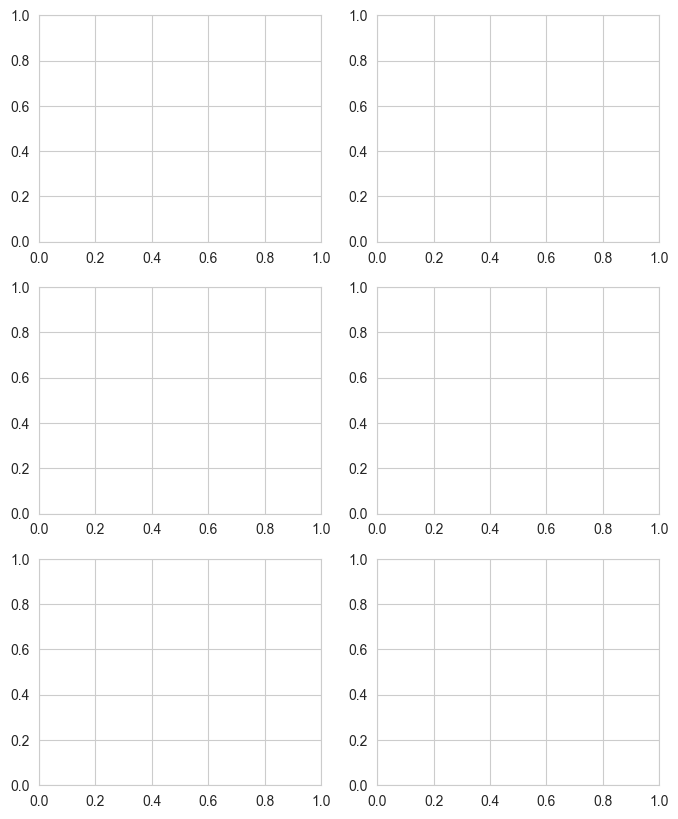

In [6]:
# X, y = load_diabetes(return_X_y=True, as_frame=True)
train_X,test_X,train_Y,test_Y =  train_test_split(data,target,train_size =0.8)

# hist_no_interact = HistGradientBoostingRegressor(
#     interaction_cst=[[i] for i in range(X.shape[1])], random_state=0
# )
# hist_no_interact.fit(X, y)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))

for i, name in enumerate(['gbr', 'rf', 'liner']):
    model = BuidModel(name)
    model.fit(train_X,train_Y)

    _ = PredictionErrorDisplay.from_estimator(
        model, test_X, test_Y, kind="actual_vs_predicted", ax=axs[i][0]
    )
    _ = PredictionErrorDisplay.from_estimator(
        model, test_X,test_Y, kind="residual_vs_predicted", ax=axs[i][1]
    )

In [9]:
X, y = fetch_openml(
    "titanic", version=1, as_frame=True, return_X_y=True, parser="pandas"
)
X = X.select_dtypes(["number", "category"]).drop(columns=["body"])

In [10]:
categorical_features = ["pclass", "sex", "embarked"]
model = make_pipeline(
    ColumnTransformer(
        transformers=[("cat", OrdinalEncoder(), categorical_features)],
        remainder="passthrough",
    ),
    HistGradientBoostingRegressor(random_state=0),
).fit(X, y)

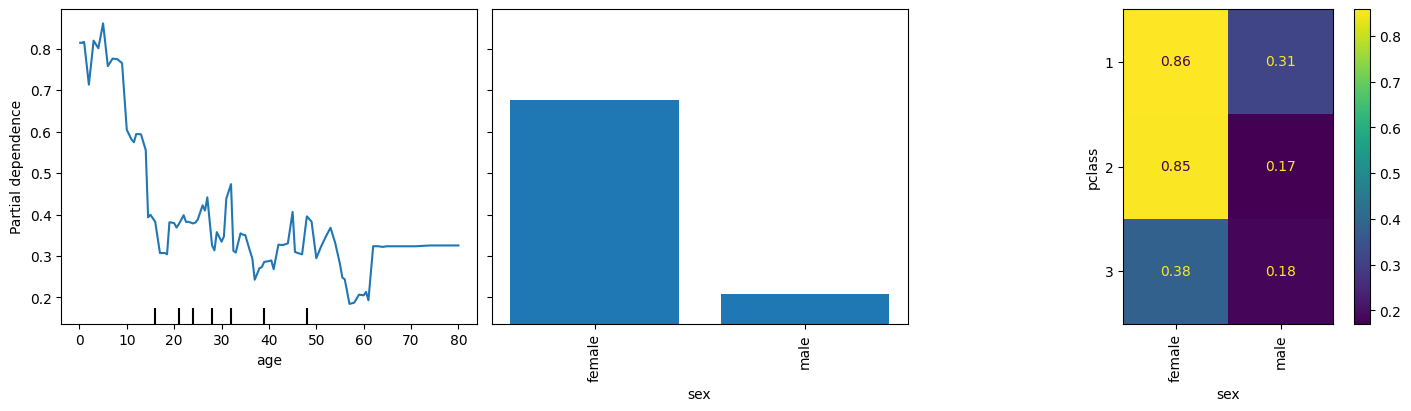

In [11]:
fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
_ = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=["age", "sex", ("pclass", "sex")],
    categorical_features=categorical_features,
    ax=ax,
)

In [26]:
# 无量纲化
def dimensionlessProcessing(df_values,df_columns):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    res = scaler.fit_transform(df_values)
    return pd.DataFrame(res,columns=df_columns)

# 求第一列(影响因素)和其它所有列(影响因素)的灰色关联值
def GRA_ONE(data,m=0): # m为参考列
    # 标准化
    data = dimensionlessProcessing(data.values,data.columns)
    # 参考数列
    std = data.iloc[:,m]
    # 比较数列
    ce = data.copy()

    n = ce.shape[0]
    m = ce.shape[1]

    # 与参考数列比较，相减
    grap = np.zeros([n,m])
    for i in range(m):
        for j in range(n):
            grap[j,i] = abs(ce.iloc[j,i] - std[j])

    # 取出矩阵中的最大值和最小值
    mmax = np.amax(grap)
    mmin = np.amin(grap)
    ρ = 0.45 # 灰色分辨系数

    # 计算值
    grap = pd.DataFrame(grap).applymap(lambda x:(mmin+ρ*mmax)/(x+ρ*mmax))

    # 求均值，得到灰色关联值
    RT = grap.mean(axis=0)
    return pd.Series(RT)

# 调用GRA_ONE，求得所有因素之间的灰色关联值
def GRA(data):
    list_columns = data.columns
    df_local = pd.DataFrame(columns=list_columns)
    for i in np.arange(data.shape[1]):
        df_local.iloc[:,i] = GRA_ONE(data,m=i)
    return df_local

def ShowGRAHeatMap(data):
    # 色彩集
    colormap = plt.cm.RdBu
    plt.figure(figsize=(12,10))
    plt.title('Pearson Correlation of Features',y=1.05,size=18)
    sns.heatmap(data.astype(float),linewidths=0.1,vmax=1.0,square=True,\
               cmap=colormap,linecolor='white',annot=True)
    plt.show()

In [18]:
df.insert(loc=len(df.columns), column='target', value=target)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


C:\Users\pc\AppData\Local\Temp\ipykernel_20348\4080465932.py:43: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_local.iloc[:,i] = GRA_ONE(data,m=i)
C:\Users\pc\AppData\Local\Temp\ipykernel_20348\4080465932.py:43: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_local.iloc[:,i] = GRA_ONE(data,m=i)
C:\Users\pc\AppData\Local\Temp\ipykernel_20348\4080465932.py:43: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use eith

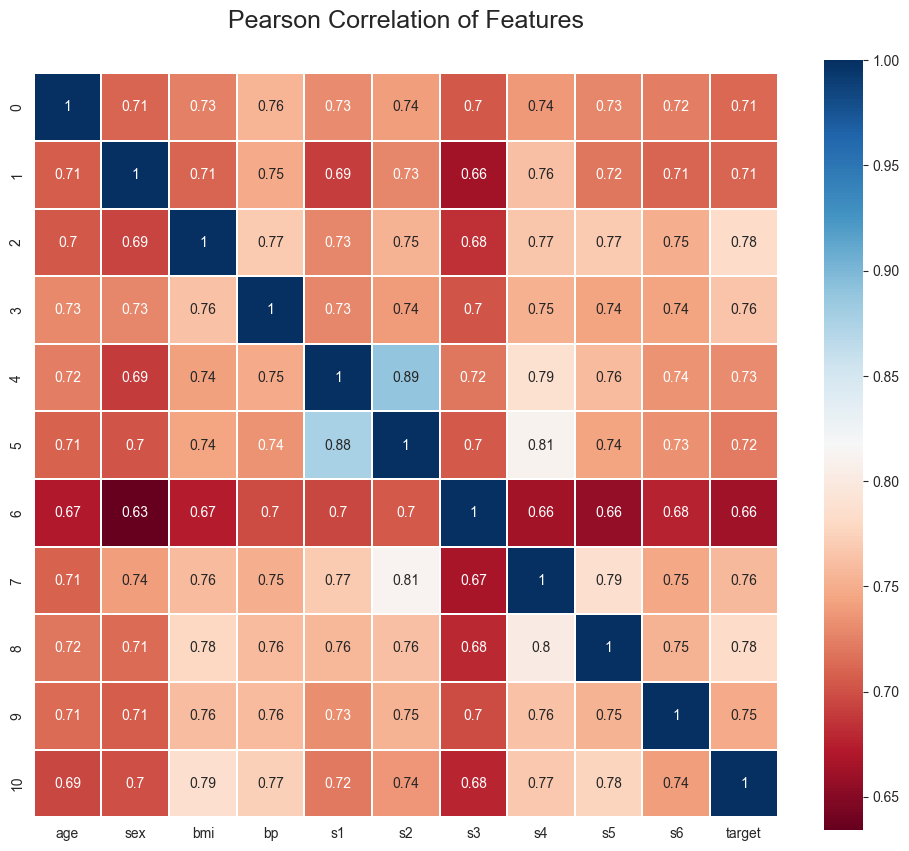

In [27]:
data_gra = GRA(df)

ShowGRAHeatMap(data_gra)


learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.503452
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504185
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling 

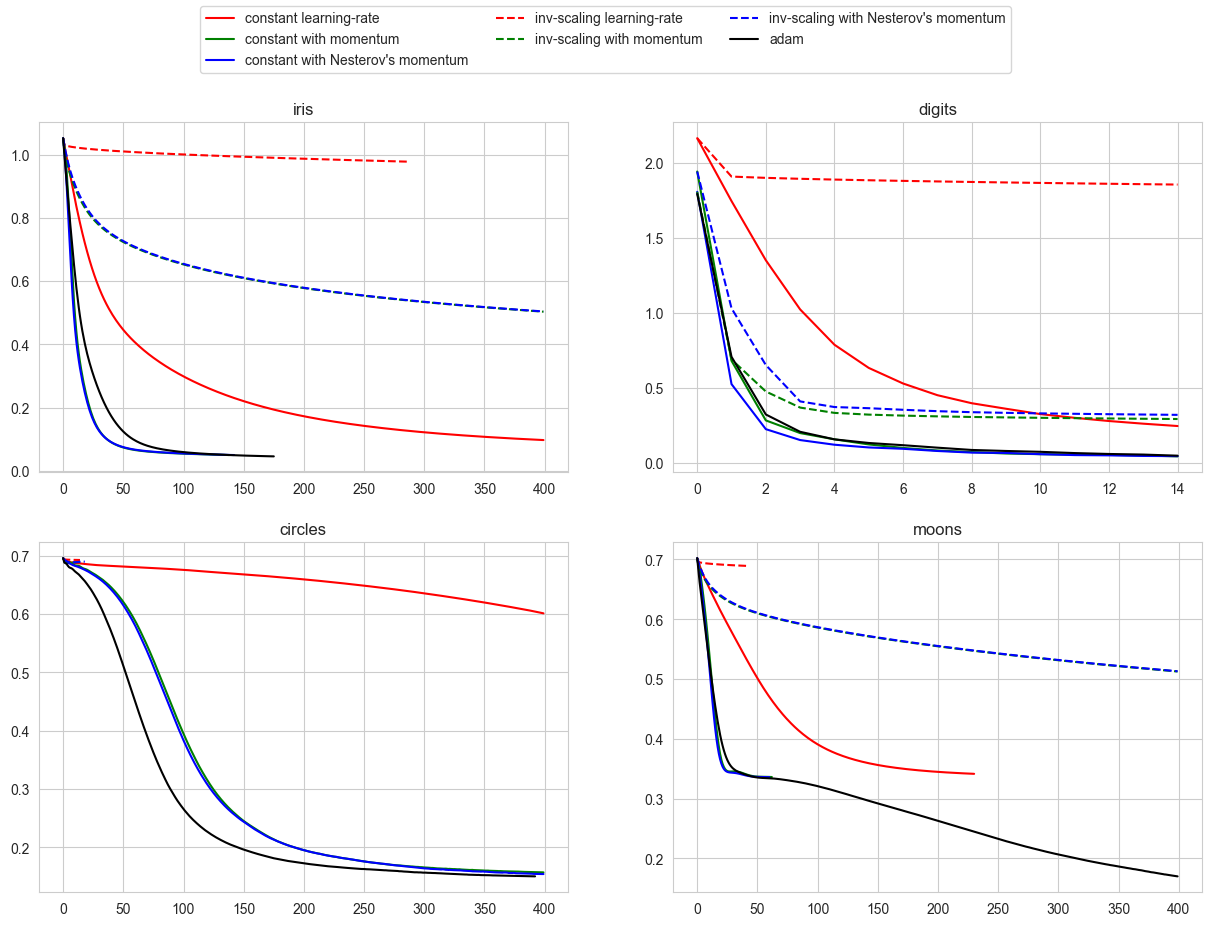

In [1]:
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [
    (iris.data, iris.target),
    (X_digits, y_digits),
    datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
    datasets.make_moons(noise=0.3, random_state=0),
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["iris", "digits", "circles", "moons"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

NameError: name 'df' is not defined

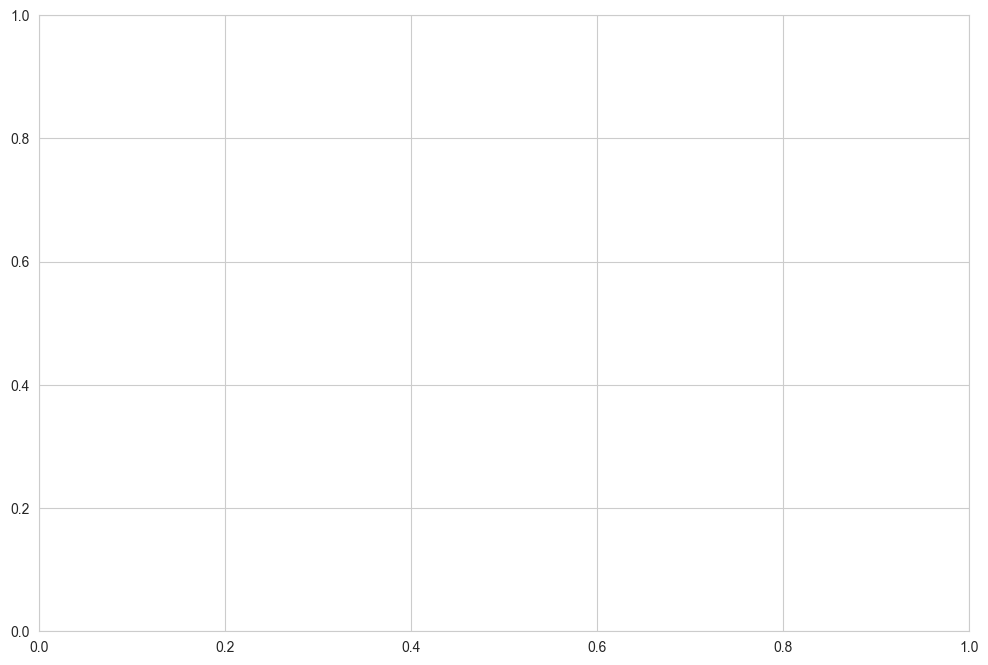

In [4]:
# df_cm = pd.DataFrame(np.abs(fa.loadings_),index=data3_1.columns)

fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")